In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    from visualize import show_single_molecule
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\new_feather'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

# Define dictionary of answers
answers_dict = {
    "Ring Vibration atoms": "9",
    "Strech Vibration atoms": "1,2 4,5",
    "Bending Vibration atoms": "22,23",
    "Dipole atoms": "11,6 4 10,11,12 11,12 5 4,5,1 4,3,2",
    "NPA manipulation atoms": "11,6 4 10,11,12 11,12,5 4,5,1 4,3,2",
    "Sub-Atoms": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25",
    "Charge values": "1,3,5,11,8,12,14",
    "Charge difference": "11,5 3,5 11,12 12,5",
    "Sterimol atoms": "4,6 6,4 4,3 11,6",
    "Bond length": "11,12 6,4 12,13 12,5 12,14 4,3",
    "Bond Angle": "11,6 4,6 4,5 1,5,4,3 11,6,4,5"
}

list_answers = [
    [9,8], [1600], [], [3000], [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    [[5,1,25], [10, 11, 12], [11, 12, 5]],
    [1, 3, 5, 11, 8, 12, 14,4,6],
    [[11, 5], [3, 5], [11, 12], [12, 5], [4, 11], [4, 3],[6,12],[4,6]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12],[3,11],[3,12],[5,11], [12, 14],[4,12]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]

]


Molecules Loaded: ['LS1621.feather', 'LS1622.feather', 'LS1630.feather', 'LS1641.feather', 'LS1642.feather', 'LS1643.feather', 'LS1661.feather', 'LS1663.feather', 'LS1685.feather', 'LS1687.feather', 'LS1688.feather', 'LS1689.feather', 'LS1690.feather', 'LS1695.feather', 'LS1696.feather', 'LS1714.feather', 'LS1715.feather', 'LS1716.feather', 'LS1717.feather', 'LS1721.feather', 'LS1723.feather', 'LS1726.feather', 'LS1734.feather', 'LS1736.feather', 'LS2000.feather', 'LS2001.feather', 'LS2002.feather', 'LS2003.feather', 'LS2004.feather', 'LS2005.feather', 'LS2006.feather', 'LS2007.feather', 'LS2008.feather'] Failed Molecules: []


In [2]:
feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\conformer_feather'

os.chdir(feather_path)

# Load molecular data

confs = data_extractor.Molecules(feather_path)

Molecules Loaded: ['LS1621_crest_best.feather', 'LS1685_crest_best.feather', 'LS1688_crest_best.feather', 'LS1689_crest_best.feather', 'LS1690_crest_best.feather', 'LS1714_crest_best.feather', 'LS1715_crest_best.feather', 'LS1716_crest_best.feather', 'LS1717_crest_best.feather', 'LS1721_crest_best.feather', 'LS1723_crest_best.feather', 'LS1726_crest_best.feather', 'LS1736_crest_best.feather', 'LS2000_crest_best.feather', 'LS2006_crest_best.feather'] Failed Molecules: []


longest_path: [ 1  2  3  4  5  6  7  8  9 10 11 18 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
longest: [8, 7, 6, 4, 3, 2, 1, 25, 26, 28]


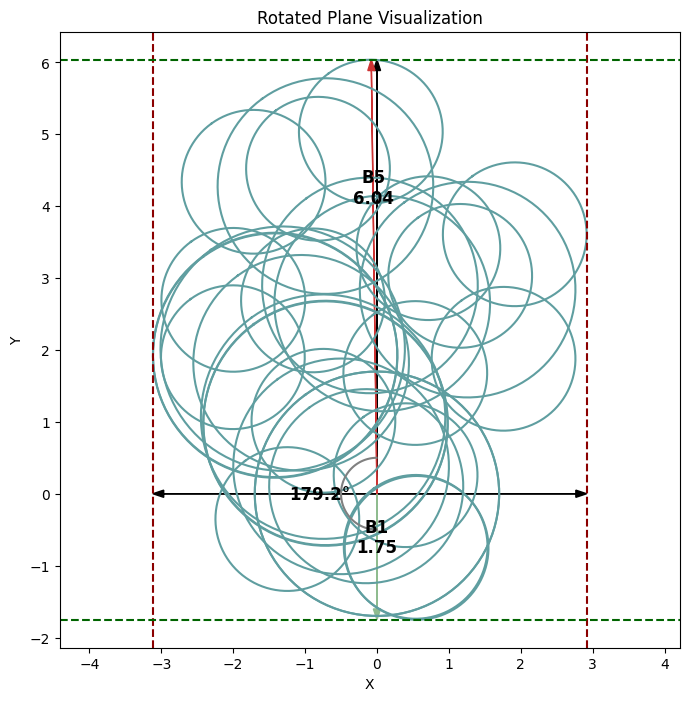

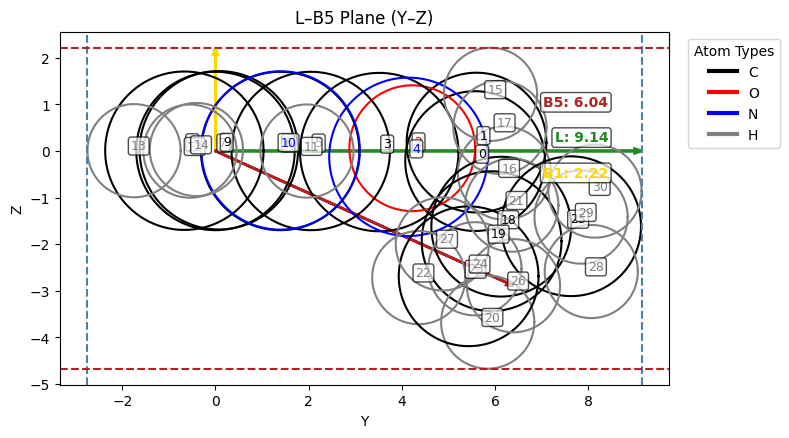

longest_path: [ 6  7  8  9 10 11 18 19]
longest: [19, 8, 9, 10, 11, 6, 7, 18]


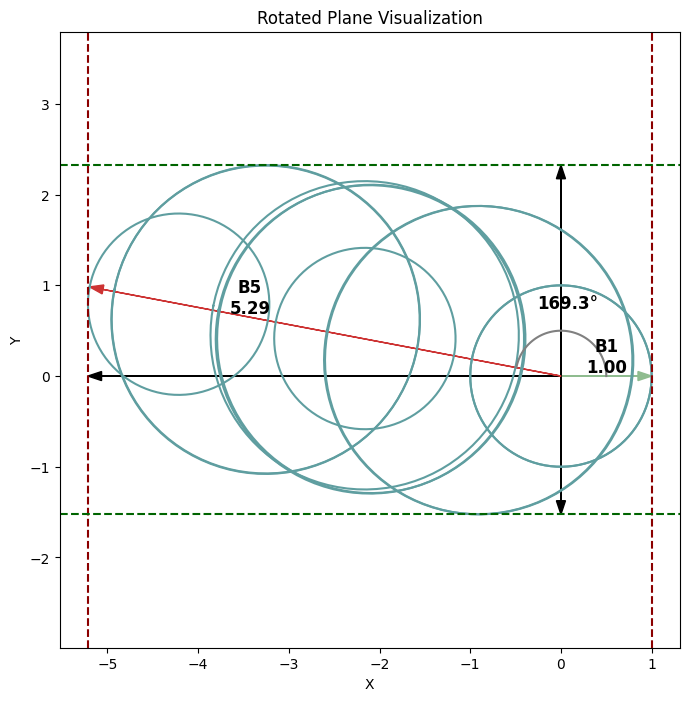

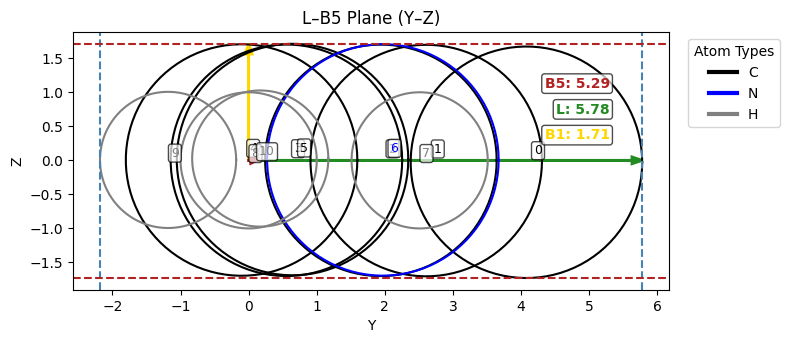

In [ ]:
# sterimol_indices =[7,8]
sterimol_indices1 =[19,18]
sterimol_indices2 =[8,7]
# st_df=mols.get_sterimol_dict(sterimol_indices)

import matplotlib.pyplot as plt

st_df2=mols.molecules[0].get_sterimol(sterimol_indices2,visualize=True)
st_df1=mols.molecules[0].get_sterimol(sterimol_indices1,visualize=True)






Correlation matrix for 'B1':
                    B1_19-18  B1_B5_angle_19-18    B1_8-7  B1_B5_angle_8-7  \
B1_19-18           1.000000          -0.646076  0.873602        -0.424932   
B1_B5_angle_19-18 -0.646076           1.000000 -0.480041         0.262780   
B1_8-7             0.873602          -0.480041  1.000000        -0.649654   
B1_B5_angle_8-7   -0.424932           0.262780 -0.649654         1.000000   
B1_9-6             0.423992          -0.061749  0.719288        -0.764905   
B1_B5_angle_9-6   -0.189113           0.391897 -0.231574         0.614156   
B1_10-11           0.113199           0.028104  0.452608        -0.714013   
B1_B5_angle_10-11 -0.362793           0.276825 -0.425518         0.404372   

                     B1_9-6  B1_B5_angle_9-6  B1_10-11  B1_B5_angle_10-11  
B1_19-18           0.423992        -0.189113  0.113199          -0.362793  
B1_B5_angle_19-18 -0.061749         0.391897  0.028104           0.276825  
B1_8-7             0.719288        -0.231574  0.

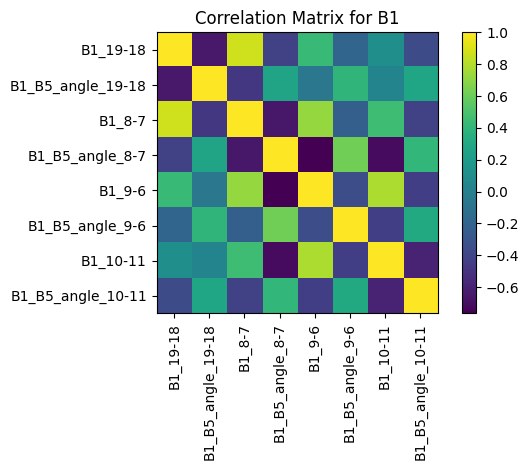

Correlation matrix for 'B5':
           B5_19-18    B5_8-7    B5_9-6  B5_10-11
B5_19-18  1.000000  0.424649  0.182926 -0.210516
B5_8-7    0.424649  1.000000  0.728151  0.190854
B5_9-6    0.182926  0.728151  1.000000  0.737234
B5_10-11 -0.210516  0.190854  0.737234  1.000000 



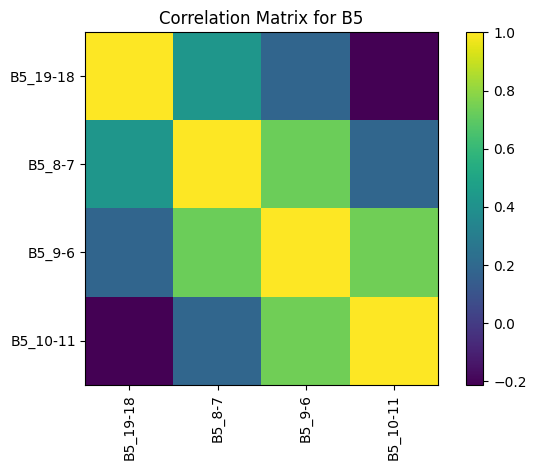

Correlation matrix for 'L':
           L_19-18     L_8-7     L_9-6   L_10-11
L_19-18  1.000000 -0.305089  0.059989  0.063500
L_8-7   -0.305089  1.000000  0.733817  0.732506
L_9-6    0.059989  0.733817  1.000000  0.999850
L_10-11  0.063500  0.732506  0.999850  1.000000 



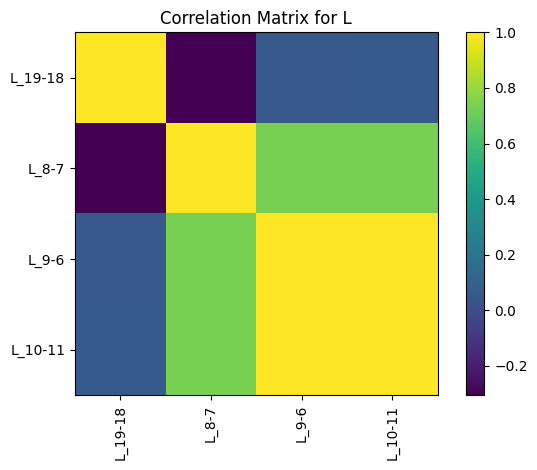

Correlation matrix for 'loc':
               loc_B5_19-18  loc_B5_8-7  loc_B5_9-6  loc_B5_10-11
loc_B5_19-18      1.000000    0.112134   -0.025601     -0.190068
loc_B5_8-7        0.112134    1.000000    0.392389     -0.501281
loc_B5_9-6       -0.025601    0.392389    1.000000      0.242380
loc_B5_10-11     -0.190068   -0.501281    0.242380      1.000000 



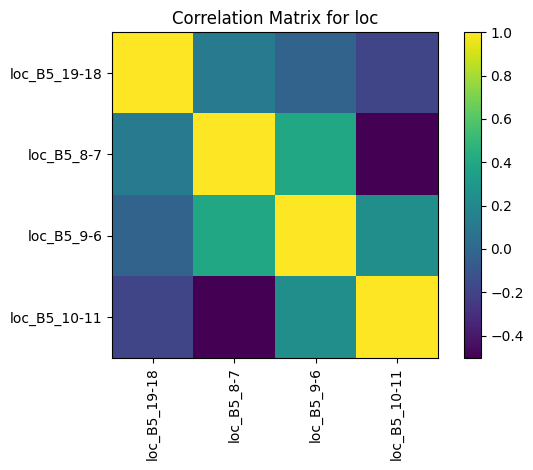

In [ ]:

def plot_correlation_matrix(corr_matrix, title):
    """Plot a correlation matrix using matplotlib."""
    fig, ax = plt.subplots()
    cax = ax.imshow(corr_matrix, aspect='equal')
    # Set tick labels
    ax.set_xticks(range(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns, rotation=90)
    ax.set_yticks(range(len(corr_matrix.index)))
    ax.set_yticklabels(corr_matrix.index)
    ax.set_title(title)
    # Add colorbar
    fig.colorbar(cax, ax=ax)
    plt.tight_layout()
    plt.show()


# Assuming `st_df` is your main DataFrame and `param_prefixes` defined as before
param_prefixes = sorted({col.split('_')[0] for col in st_df.columns})
for prefix in param_prefixes:
    cols = [col for col in st_df.columns if col.startswith(f"{prefix}_")]
    df_param = st_df[cols]
    corr_matrix = df_param.corr()
    print(f"Correlation matrix for '{prefix}':\n", corr_matrix, "\n")
    plot_correlation_matrix(corr_matrix, title=f"Correlation Matrix for {prefix}")

[19, 18]


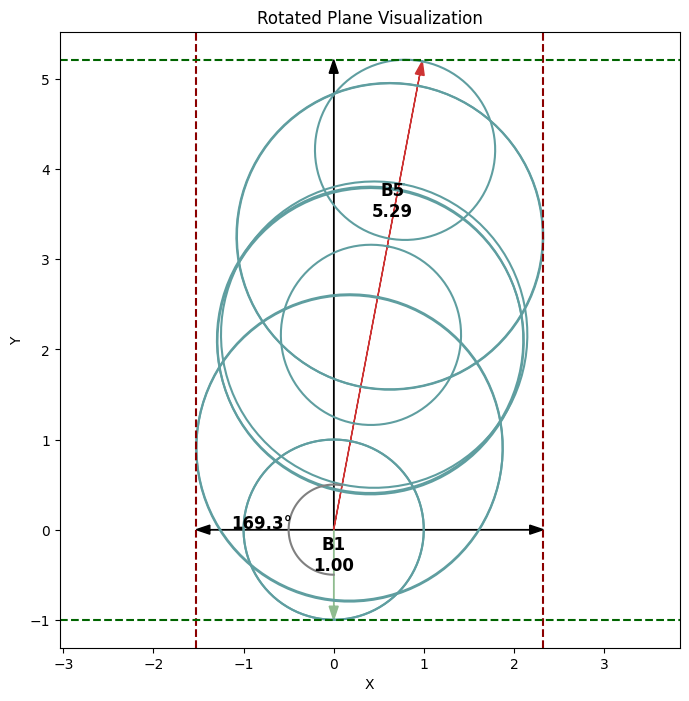

[8, 7]


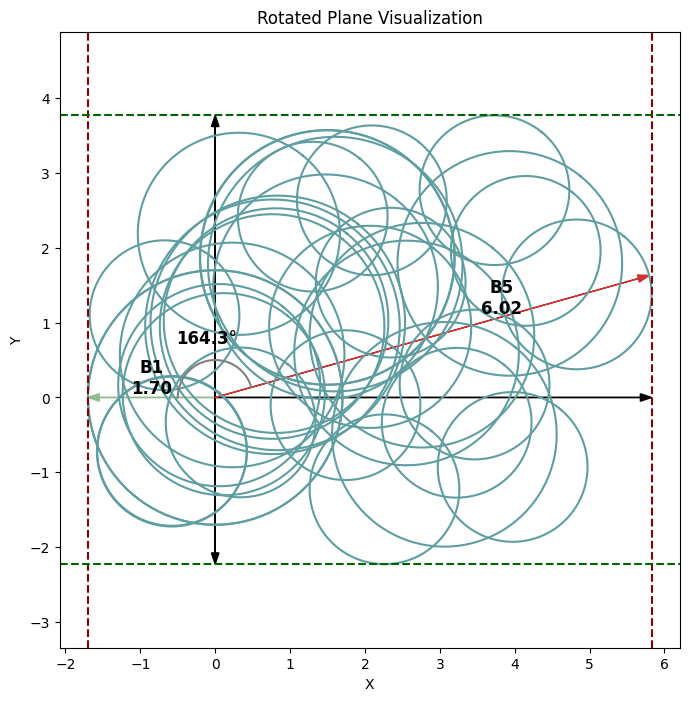

[20, 9]


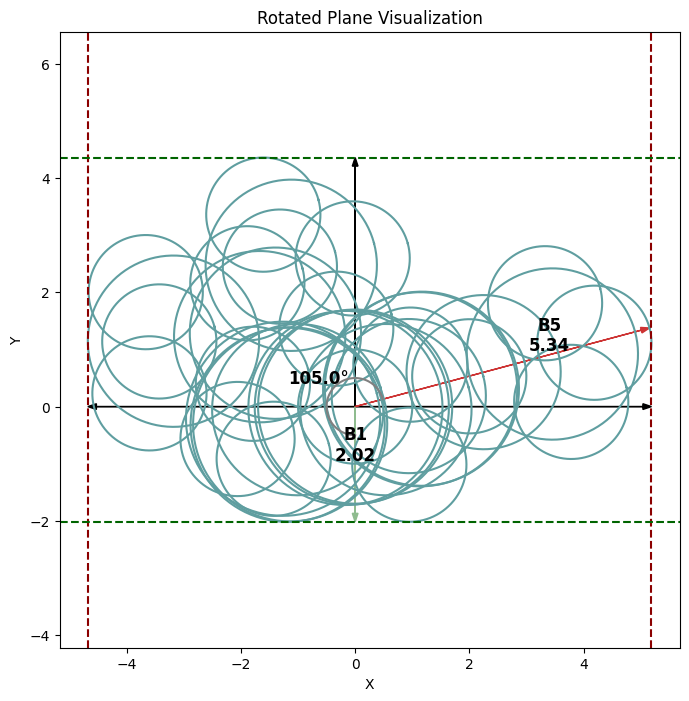

[10, 11]


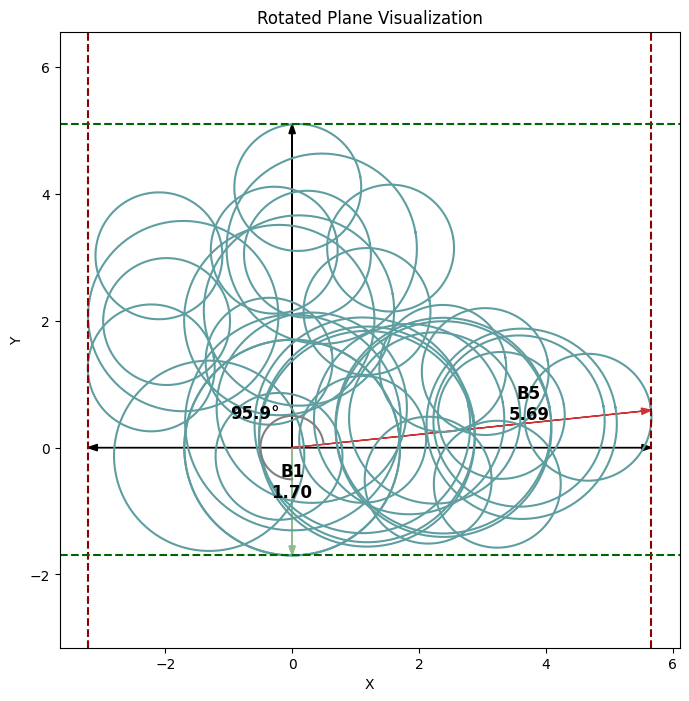

In [7]:
sterimol_indices =[[19,18],[8,7],[20,9],[10,11]]
for idx,mol in zip(sterimol_indices,mols.molecules):
    print(idx)
    st_df=mol.get_sterimol(idx,visualize=True)

In [2]:
df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df

None
Calculating Bend vibration for atoms [22, 23] with threshold 3000 
 Remember : ALWAYS LOOK AT THE RESULTING VIBRATION
new_origin [-0.94311572 -0.62409816 -0.1943688 ]
new_origin [-0.94311572 -0.62409816 -0.1943688 ]
new_origin [-0.94311572 -0.62409816 -0.1943688 ]
new_origin [-0.13582788 -0.36023092 -0.36105472]
new_origin [-0.13582788 -0.36023092 -0.36105472]
new_origin [-0.13582788 -0.36023092 -0.36105472]
new_origin [ 0.66797604 -0.195912   -0.19982712]
new_origin [ 0.66797604 -0.195912   -0.19982712]
new_origin [ 0.66797604 -0.195912   -0.19982712]
new_origin [-0.48992772 -0.06913548 -0.32672048]
new_origin [-0.48992772 -0.06913548 -0.32672048]
new_origin [-0.48992772 -0.06913548 -0.32672048]
new_origin [-0.72386328  0.97961268 -0.46050236]
new_origin [-0.72386328  0.97961268 -0.46050236]
new_origin [-0.72386328  0.97961268 -0.46050236]
new_origin [-0.87306228  1.02780396 -0.5024328 ]
new_origin [-0.87306228  1.02780396 -0.5024328 ]
new_origin [-0.87306228  1.02780396 -0.50243

,cross,cross_angle,para,para_angle,Frequency_Bending_22-23,Cross_mag_Bending_22-23,dip_x_NPA_11-6-4,dip_y_NPA_11-6-4,dip_z_NPA_11-6-4,total_dipole_NPA_11-6-4,dip_x_NPA_10-11-12,dip_y_NPA_10-11-12,dip_z_NPA_10-11-12,total_dipole_NPA_10-11-12,dip_x_NPA_11-12-5,dip_y_NPA_11-12-5,dip_z_NPA_11-12-5,total_dipole_NPA_11-12-5,dip_x_NPA_4-5-1,dip_y_NPA_4-5-1,dip_z_NPA_4-5-1,total_dipole_NPA_4-5-1,dip_x_NPA_4-3-2,dip_y_NPA_4-3-2,dip_z_NPA_4-3-2,total_dipole_NPA_4-3-2,dipole_x_5-1-25,dipole_y_5-1-25,dipole_z_5-1-25,total_dipole_5-1-25,dipole_x_10-11-12,dipole_y_10-11-12,dipole_z_10-11-12,total_dipole_10-11-12,dipole_x_11-12-5,dipole_y_11-12-5,dipole_z_11-12-5,total_dipole_11-12-5,nbo_atom_1,nbo_atom_3,nbo_atom_5,nbo_atom_11,nbo_atom_8,nbo_atom_12,nbo_atom_14,nbo_atom_4,nbo_atom_6,hirshfeld_atom_1,hirshfeld_atom_3,hirshfeld_atom_5,hirshfeld_atom_11,hirshfeld_atom_8,hirshfeld_atom_12,hirshfeld_atom_14,hirshfeld_atom_4,hirshfeld_atom_6,cm5_atom_1,cm5_atom_3,cm5_atom_5,cm5_atom_11,cm5_atom_8,cm5_atom_12,cm5_atom_14,cm5_atom_4,cm5_atom_6,nbo_diff_11-5,nbo_diff_3-5,nbo_diff_11-12,nbo_diff_12-5,nbo_diff_4-11,nbo_diff_4-3,nbo_diff_6-12,nbo_diff_4-6,hirshfeld_diff_11-5,hirshfeld_diff_3-5,hirshfeld_diff_11-12,hirshfeld_diff_12-5,hirshfeld_diff_4-11,hirshfeld_diff_4-3,hirshfeld_diff_6-12,hirshfeld_diff_4-6,cm5_diff_11-5,cm5_diff_3-5,cm5_diff_11-12,cm5_diff_12-5,cm5_diff_4-11,cm5_diff_4-3,cm5_diff_6-12,cm5_diff_4-6,B1_4-6,B5_4-6,L_4-6,loc_B5_4-6,B1_B5_angle_4-6,B1_6-4,B5_6-4,L_6-4,loc_B5_6-4,B1_B5_angle_6-4,B1_4-3,B5_4-3,L_4-3,loc_B5_4-3,B1_B5_angle_4-3,B1_11-6,B5_11-6,L_11-6,loc_B5_11-6,B1_B5_angle_11-6,bond_length_11-12,bond_length_3-11,bond_length_3-12,bond_length_5-11,bond_length_12-14,bond_length_4-12,"angle_[11, 6, 4]","angle_[6, 4, 5]","dihedral_[1, 5, 4, 3]","dihedral_[11, 6, 4, 5]"
LS1621,1652.6065,7.497617,1674.6111,79.502920,3176.5085,0.341497,1.160731,4.299914,-0.409019,4.472567,-3.054492,3.064794,-0.171324,4.330385,4.325054,-0.650147,-0.077242,4.374328,4.430421,-1.231978,0.382390,4.614393,0.915549,4.461030,-0.808884,4.625290,-1.863747,-1.024725,-10.519571,10.7325,-10.180303,-3.377346,-0.374115,10.7325,3.360200,-10.191187,0.183729,10.7325,-0.08843,-0.47523,-0.44749,-0.37993,-0.15272,0.38106,-0.70421,0.53871,0.12507,0.025547,-0.131285,-0.108202,-0.053677,-0.004202,0.164793,-0.144169,0.140115,0.056235,0.022678,-0.207793,-0.353321,-0.314159,-0.057741,0.397356,-0.340934,0.254356,0.129160,0.06756,-0.02774,-0.76099,0.82855,0.91864,1.01394,-0.25599,0.41364,0.054525,-0.023083,-0.218470,0.272995,0.193792,0.271400,-0.108558,0.083880,0.039162,0.145528,-0.711515,0.750677,0.568515,0.462149,-0.268196,0.125196,1.6998,3.2852,6.2555,3.7923,91.0482,2.0059,4.8590,7.1930,4.5669,123.2590,1.9238,6.1439,3.5204,1.3677,128.2471,1.9574,7.3621,5.4352,3.2715,119.8702,2.178381,3.594038,4.262064,2.745039,1.973706,2.963223,115.225880,123.183505,3.866926,4.982389
LS1622,1660.1501,22.966310,1688.8190,69.201055,3179.1136,0.337101,0.272959,1.839751,-0.989847,2.106891,-3.199226,1.077458,-0.910373,3.496389,2.476554,-1.778912,0.796034,3.151431,0.554543,-0.580570,1.047279,1.319611,-0.380821,0.612844,-0.994820,1.228930,-1.792450,1.775714,-9.693686,10.0166,-9.997078,-0.459818,-0.424948,10.0166,5.574201,-8.321639,0.110408,10.0166,-0.08915,-0.47427,-0.44016,-0.37463,-0.12868,0.37809,-0.70028,0.53285,0.13895,0.026314,-0.130423,-0.105224,-0.048963,0.000883,0.165090,-0.141094,0.139980,0.063963,0.023349,-0.206961,-0.349665,-0.308815,-0.048492,0.396865,-0.337926,0.254449,0.136669,0.06553,-0.03411,-0.75272,0.81825,0.90748,1.00712,-0.23914,0.39390,0.056261,-0.025199,-0.214053,0.270314,0.188943,0.270403,-0.101127,0.076017,0.040850,0.142704,-0.705680,0.746530,0.563264,0.461410,-0.260196,0.117780,2.0629,3.2858,7.6548,3.7996,109.0228,2.0038,4.8566,7.1931,4.5734,123.1976,1.9231,6.1444,3.5161,1.3591,128.1958,2.3398,7.3589,5.4389,3.2800,111.8759,2.181839,3.594216,4.268282,2.745470,1.973025,2.969747,115.242874,123.122975,3.817904,5.056583
LS1630,1643.0843,30.217985,1678.5785,58.782446,3176.0039

In [11]:
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs')
df.to_csv('added_features_dip.csv', index=True)

NameError: name 'df' is not defined

Database does not exist. It will be created at: results_added_features.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['Cross_mag_Bending_22-23', 'cm5_atom_12', 'Amplitude_Stretch_5_4', 'Frequency_Stretch_5_4', 'loc_B5_1-5', 'cross_angle', 'total_dipole_5-1-25', 'dipole_x_10-11-12', 'bite_angle_inverted', 'loc_B5_19-18', 'B1_19-18', 'B1_11-6', 'bond_length_12-14', 'total_dipole_10-11-12', 'L_11-6', 'para_angle', 'B1_20-9', 'hirshfeld_atom_12', 'bite_angle']



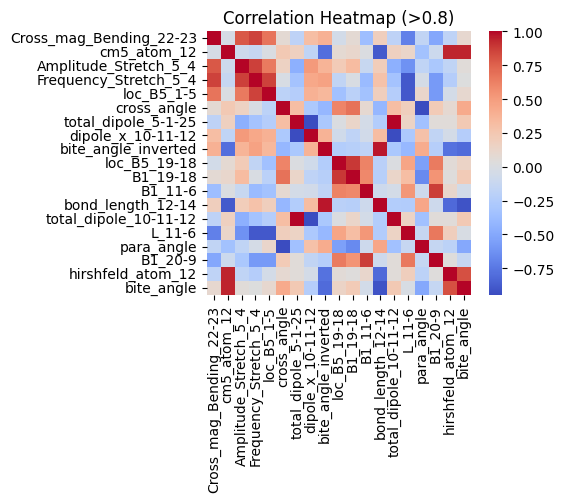


Correlated features were not dropped.

Left out samples:   ['LS1717', 'LS1690', 'LS1661', 'LS1663']
Remaining samples:  ['LS1621', 'LS1622', 'LS1630', 'LS1641', 'LS1642', 'LS1643', 'LS1685', 'LS1687', 'LS1688', 'LS1689', 'LS1695', 'LS1696', 'LS1714', 'LS1715', 'LS1716', 'LS1721', 'LS1723', 'LS1726', 'LS1734', 'LS1736', 'LS2000', 'LS2001', 'LS2002', 'LS2003', 'LS2004', 'LS2005', 'LS2006', 'LS2007', 'LS2008']
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 5), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
             Estimate  Std. Error    t value       p value
(Intercept)  0.941101    0.058088  16.201269  4.507505e-14
L_25-1       0.267616    0.065752   4.070064  4.726487e-04
B5_19-18     0.794855    0.082377   9.648954  1.49

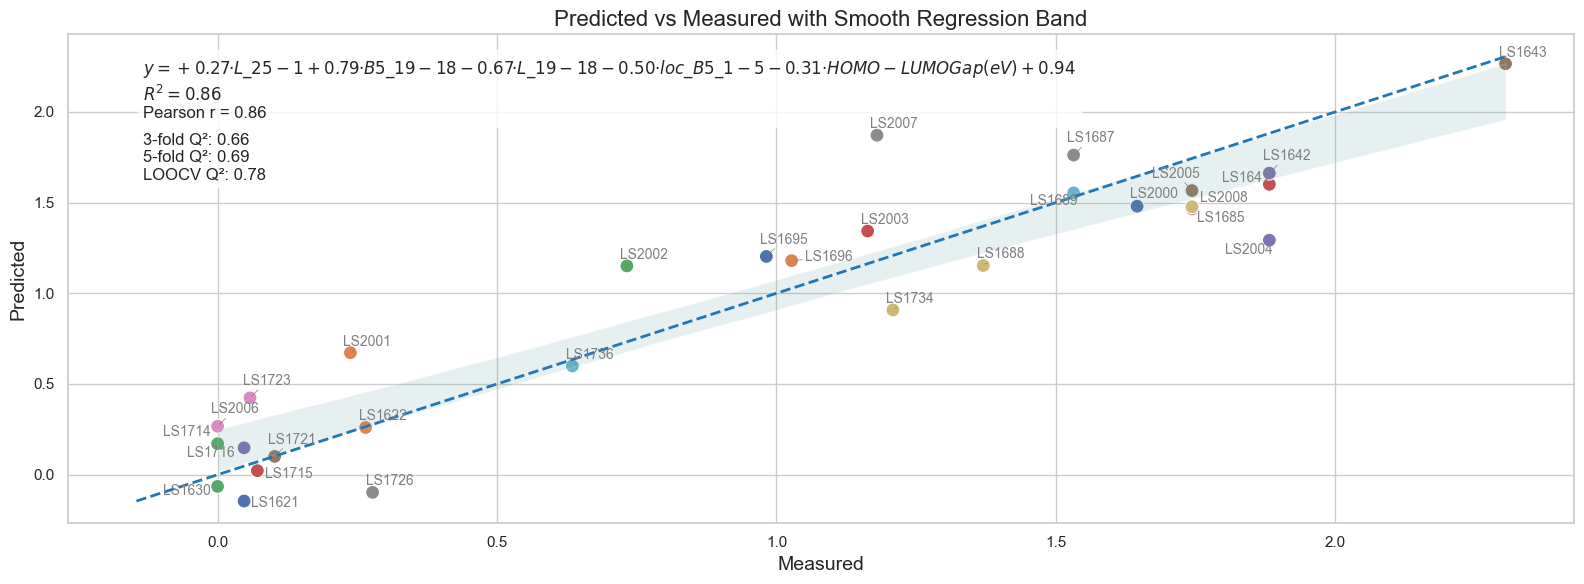

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


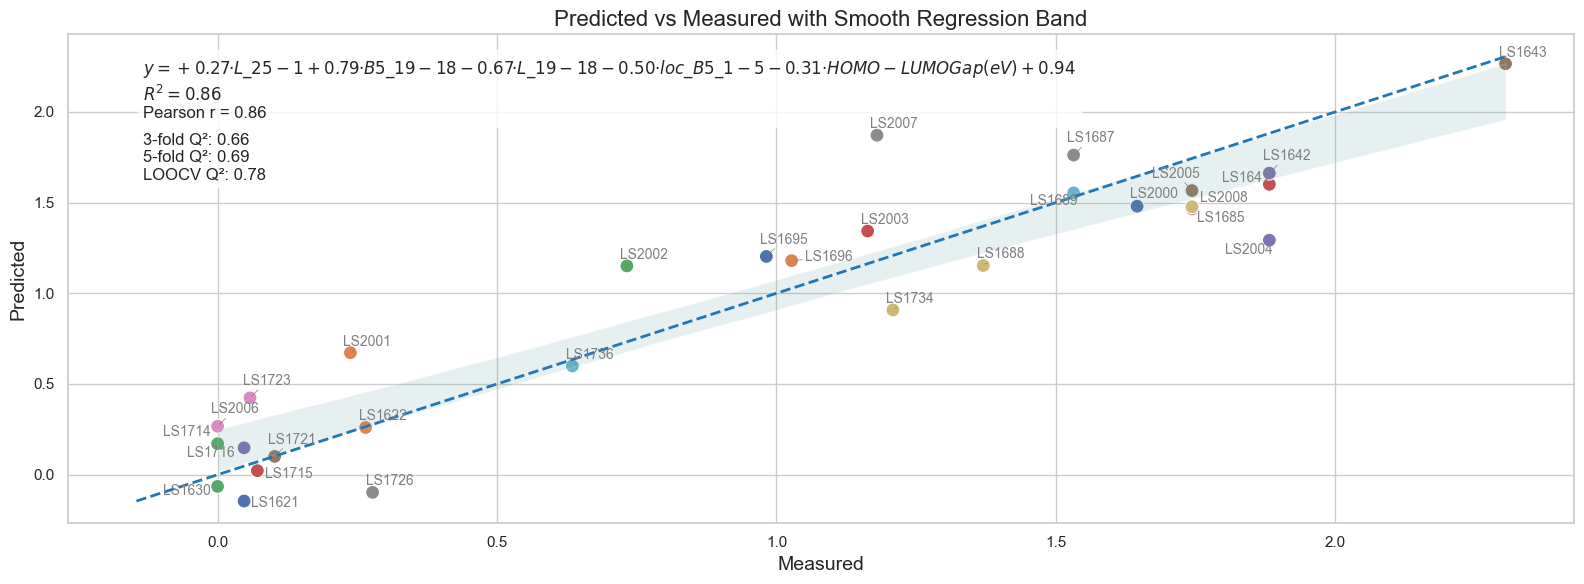

In [15]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
df=pd.read_csv(csv_path, index_col=0)

# df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

# pick 4 random samples to leave out
leave_out = np.random.choice(df.index, size=4, replace=False).tolist()
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=leave_out, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
# Regression_model.leave_out_samples(leave_out=leave_out, keep_only=True)
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
features=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']


# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
# x=Regression_model.check_linear_regression_assumptions()
# Regression_model.fit_and_evaluate_combinations()
plot.generate_and_display_q2_scatter_plot(Regression_model,features_combination_1)


In [9]:
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs')
print(os.listdir())


['added_features.csv', 'combined_features1.csv', 'combined_features_new.csv', 'compset_charges.csv', 'comp_set_app1.csv', 'comp_set_app2.csv', 'cube', 'CURATE', 'edit.xyz', 'feather_files', 'Files to fix TertButyl Side.txt', 'GENERATE', 'modeling.py', "model_plot_['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12', 'bite_angle_inverted'].png", "model_plot_['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12'].png", "model_plot_['cross_angle', 'dipole_y_10-11-12', 'dip_y_NPA_11-6-4', 'L_11-6'].png", "model_plot_['Cross_mag_Bending_22-23', 'dipole_z_10-11-12', 'hirshfeld_atom_12', 'bond_length_12-14'].png", "model_plot_['Cross_mag_Bending_22-23', 'hirshfeld_atom_12', 'cm5_atom_5', 'bond_length_12-14', 'HOMO-LUMO Gap (eV)'].png", "model_plot_['dipole_z_11-12-5', 'nbo_atom_14', 'bond_length_11-12', 'bond_length_12-14'].png", "model_plot_['hirshfeld_atom_12', 'cm5_atom_5', 'bond_length_12-14', 'HOMO-LUMO Gap (eV)', 'bite_angle_inverted'].png", 'mol.txt', 'morfeus_features.csv', 'old', 'pca_data_n

In [18]:
df=pd.read_csv('results_combined_features_new.csv')
# remove NaN
df = df.dropna()    
import ast
# organize by r2
df = df.sort_values(by='r2', ascending=False)
print(df.columns,df.head())
# save a list of the top 10 combinations
top_10_combinations = df.head(10)['combination'].tolist()

list_of_lists = [list(ast.literal_eval(s)) for s in top_10_combinations]
print(list_of_lists)

Index(['combination', 'r2', 'q2', 'mae', 'rmsd', 'threshold'], dtype='object')                                               combination        r2   q2  mae  \
187733  ('hirshfeld_diff_3-5', 'bond_length_11-12', 'H...  0.839330 -inf  inf   
198361  ('bond_length_12-14', 'bite_angle', 'HOMO-LUMO...  0.834546 -inf  inf   
198477  ('cone_angle', 'bite_angle', 'HOMO-LUMO Gap (e...  0.832721 -inf  inf   
134803  ('dipole_z_10-11-12', 'hirshfeld_atom_12', 'HO...  0.828070 -inf  inf   
187001  ('hirshfeld_diff_11-5', 'bite_angle', 'HOMO-LU...  0.822685 -inf  inf   

        rmsd  threshold  
187733   inf       0.85  
198361   inf       0.85  
198477   inf       0.85  
134803   inf       0.85  
187001   inf       0.85  
[['hirshfeld_diff_3-5', 'bond_length_11-12', 'HOMO-LUMO Gap (eV)'], ['bond_length_12-14', 'bite_angle', 'HOMO-LUMO Gap (eV)'], ['cone_angle', 'bite_angle', 'HOMO-LUMO Gap (eV)'], ['dipole_z_10-11-12', 'hirshfeld_atom_12', 'HOMO-LUMO Gap (eV)'], ['hirshfeld_diff_11-5', 'bite_ang

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['hirshfeld_diff_3-5', 'bond_length_11-12'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 3), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                    Estimate  Std. Error    t value       p value
(Intercept)         0.941101    0.061403  15.326622  3.219647e-14
bond_length_12-14   0.174269    0.065808   2.648125  1.381607e-02
bite_angle         -0.543215    0.065544  -8.287742  1.226382e-08
HOMO-LUMO Gap (eV) -0.255962    0.061765  -4.144093  3.419340e-04
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.7109064535469132, MAE: 0.3130727182259009, RMSD: 

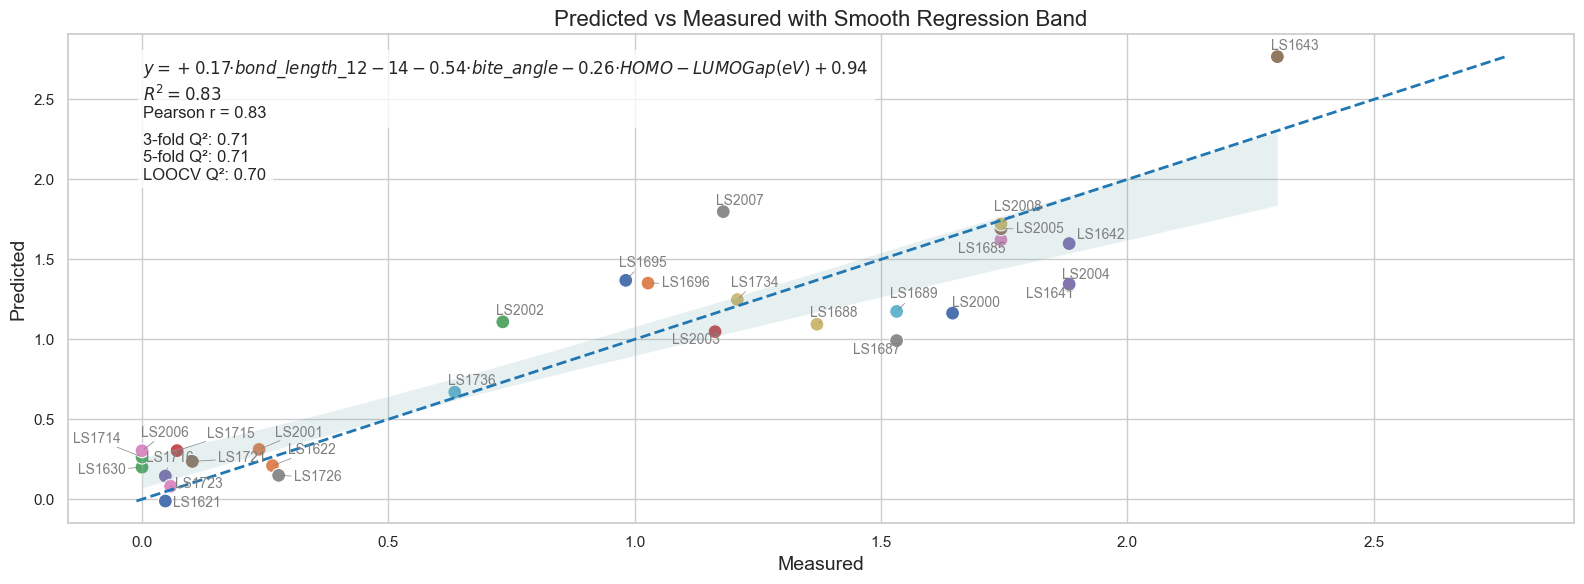

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 3), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                    Estimate  Std. Error    t value       p value
(Intercept)         0.941101    0.064294  14.637434  9.103829e-14
cone_angle          0.137665    0.067187   2.048972  5.109876e-02
bite_angle         -0.632767    0.065841  -9.610504  7.104832e-10
HOMO-LUMO Gap (eV) -0.246357    0.065640  -3.753149  9.312900e-04
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.668890849949517, MAE: 0.33555293665763186, RMSD: 0.4621865813753122
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.6714175

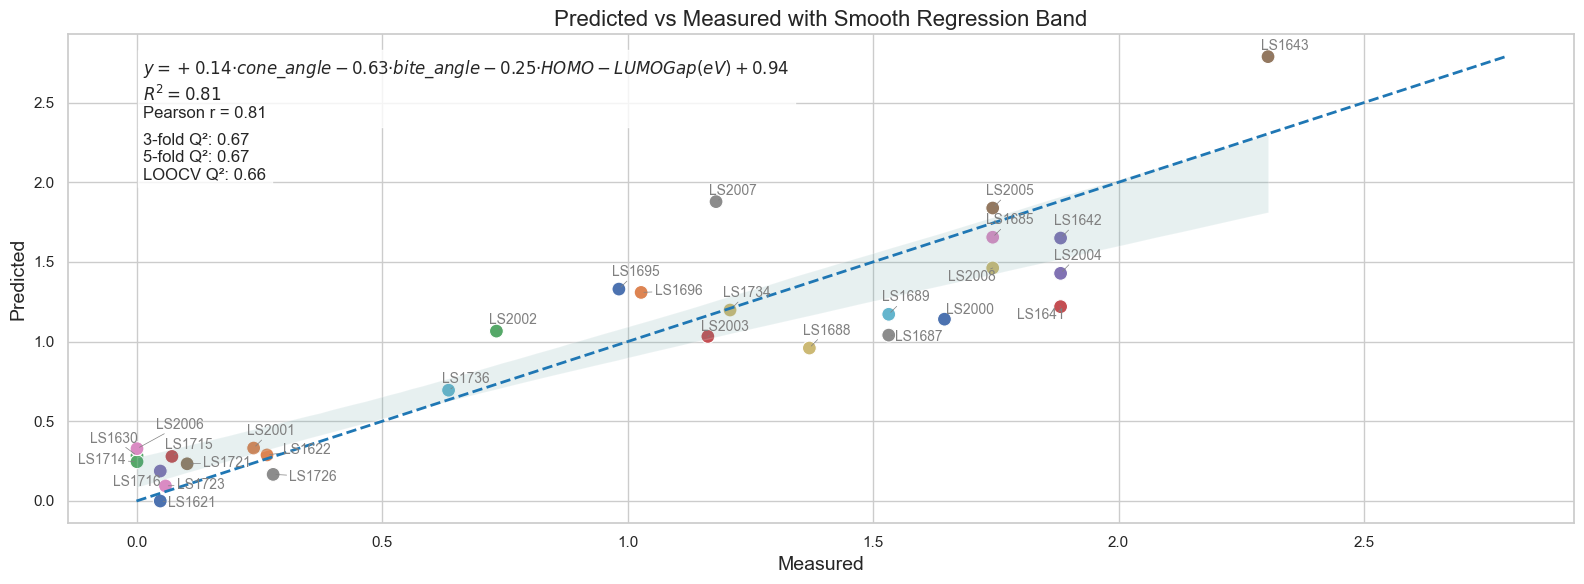

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 3), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                    Estimate  Std. Error    t value       p value
(Intercept)         0.941101    0.055732  16.886235  3.552714e-15
dipole_z_10-11-12   0.309757    0.055933   5.538000  9.328667e-06
hirshfeld_atom_12   0.534717    0.056061   9.538140  8.254115e-10
HOMO-LUMO Gap (eV) -0.215818    0.055879  -3.862260  7.051195e-04
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.7883403689576691, MAE: 0.2868314085495822, RMSD: 0.34976507240122556
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.804314

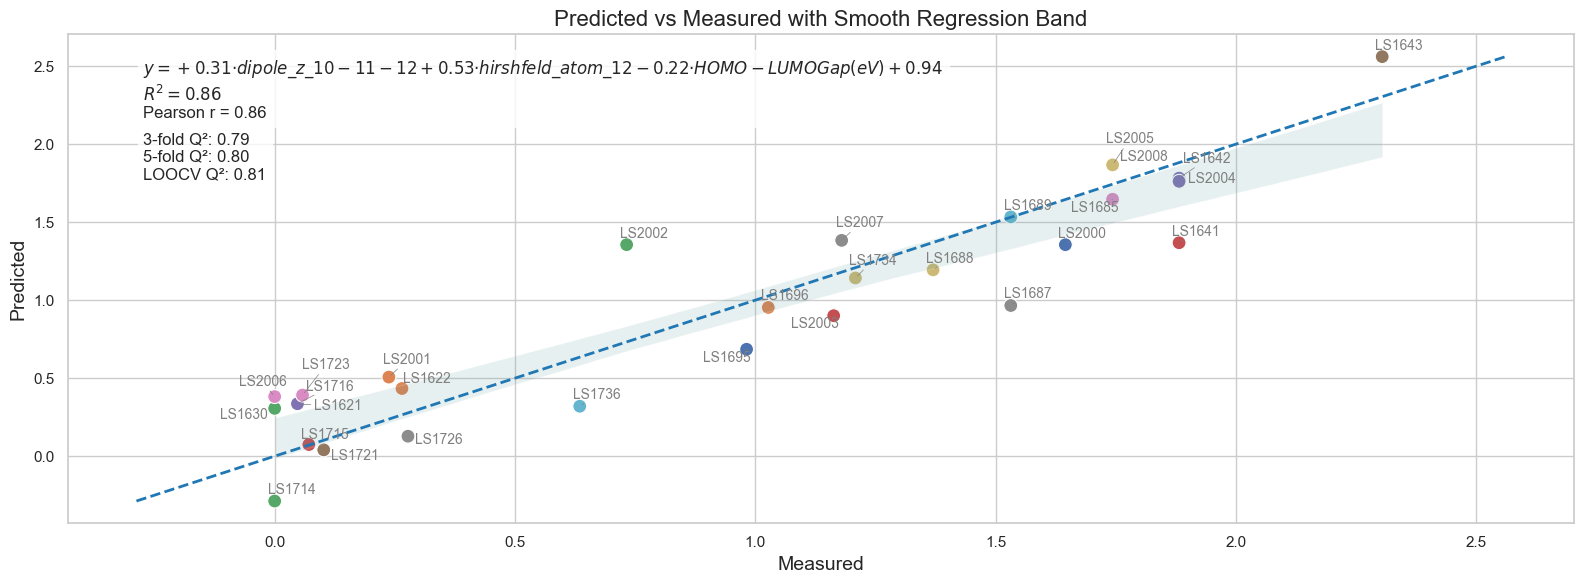

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['hirshfeld_diff_11-5'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['B5_6-4', 'bond_length_11-12'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['hirshfeld_atom_5'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['dip_z_NPA_4-3-2'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Error extracting features: "['hirshfeld_diff_11-12'] not in index"
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X

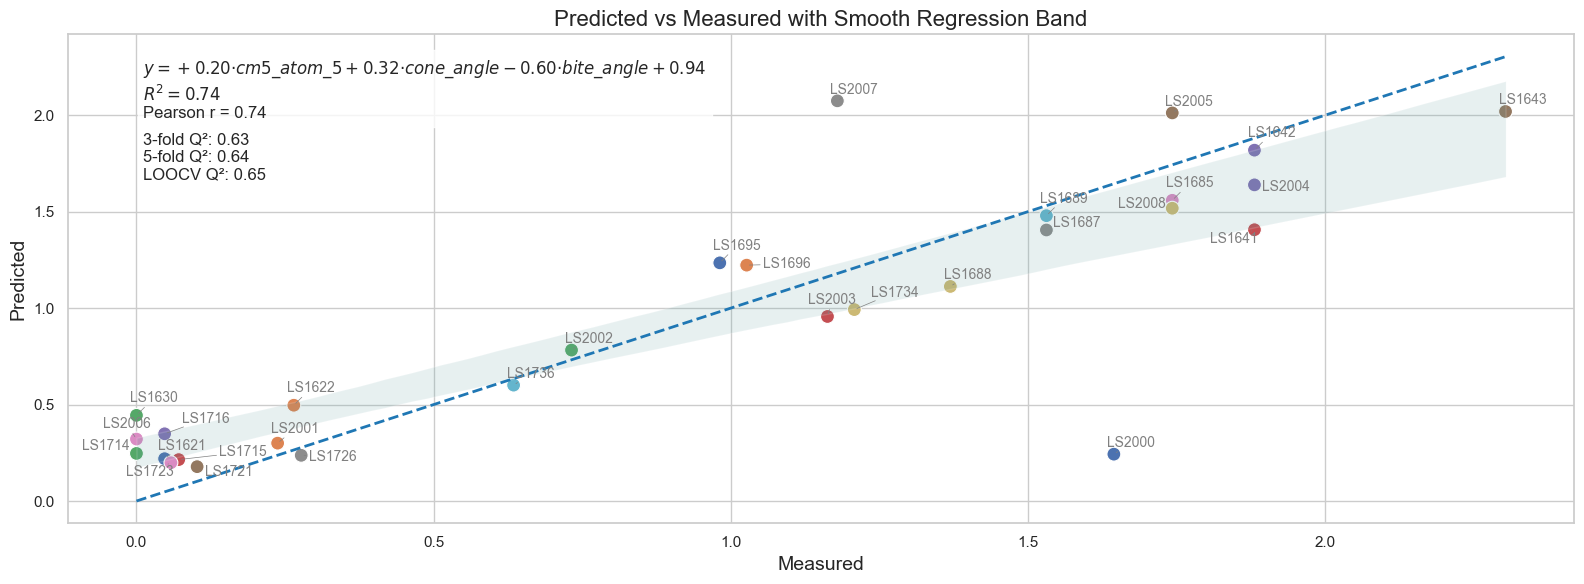

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


In [19]:
for combination in list_of_lists:
    plot.generate_and_display_q2_scatter_plot(Regression_model,combination)

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 4), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                    Estimate  Std. Error    t value       p value
(Intercept)         0.941101    0.054139  17.383025  4.218847e-15
dipole_z_10-11-12   0.325963    0.055296   5.894915  4.414415e-06
hirshfeld_atom_12   0.490074    0.061362   7.986620  3.250868e-08
HOMO-LUMO Gap (eV) -0.202228    0.054960  -3.679546  1.179045e-03
B5_19-18            0.098500    0.062389   1.578807  1.274712e-01
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.7932778466142061, MAE: 0.2874314453419935, RMSD: 0.34943666755850666
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.8052852204741235

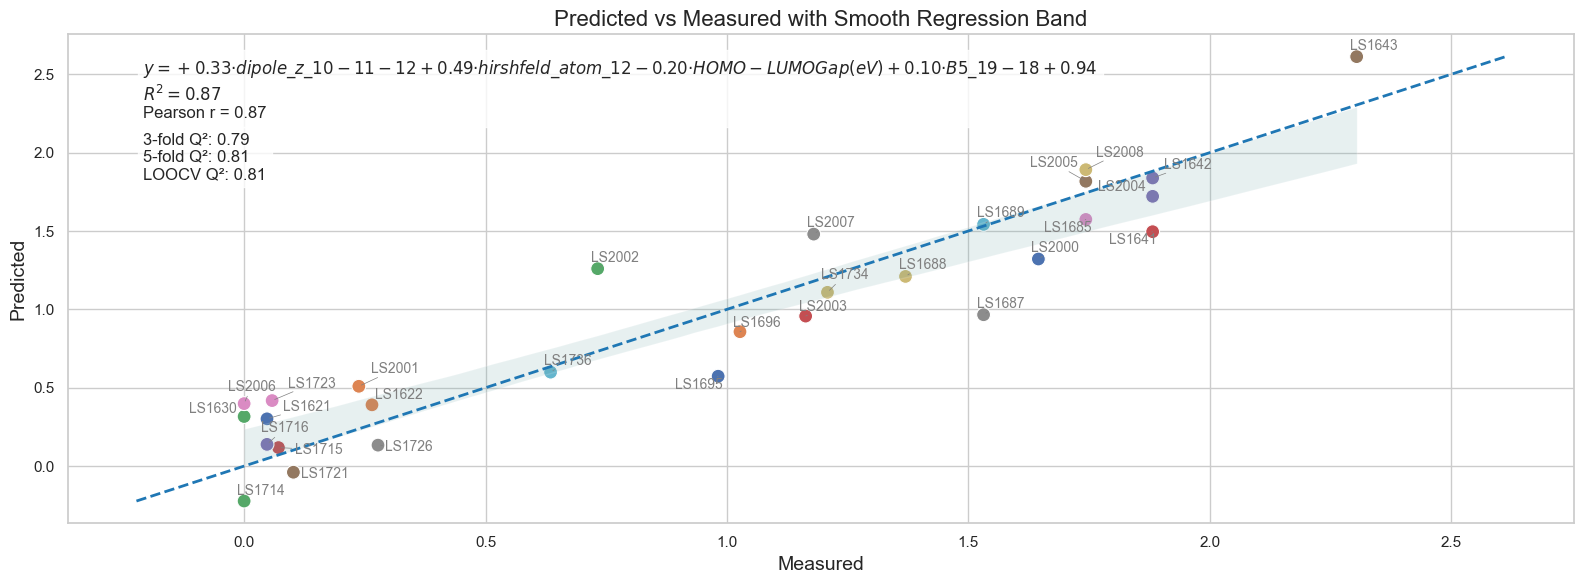

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


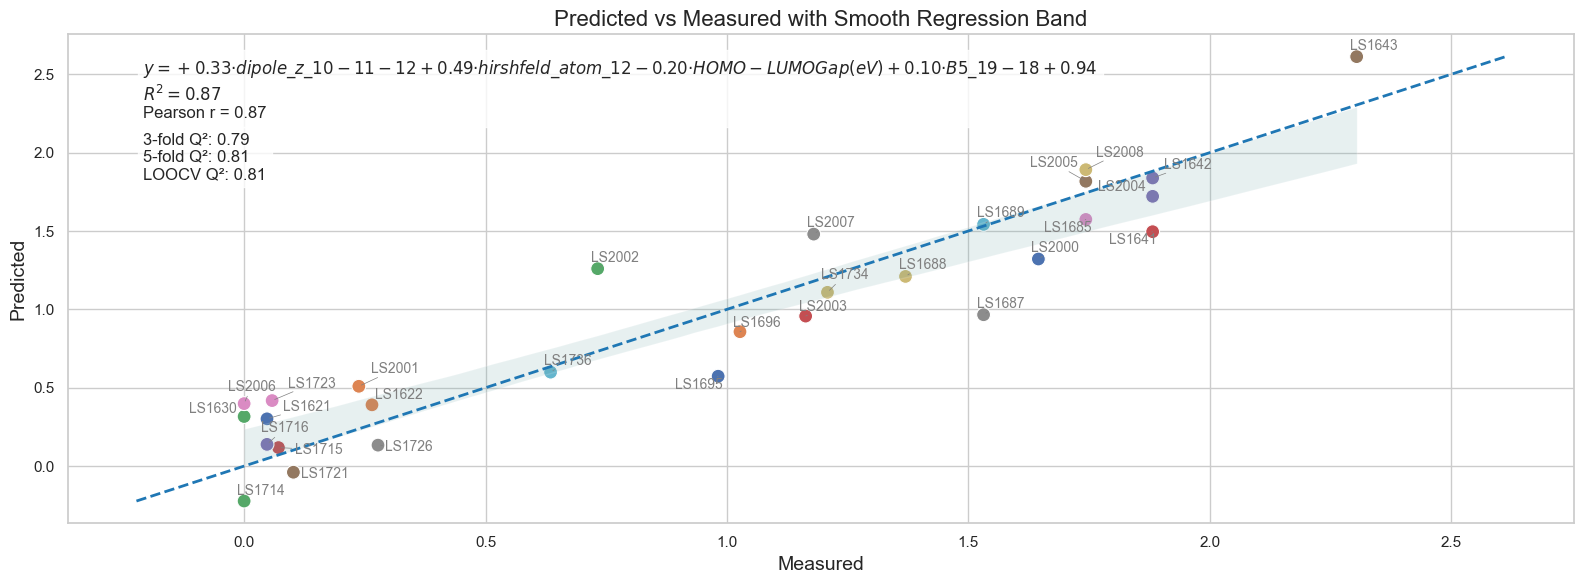

In [20]:
features=['dipole_z_10-11-12', 'hirshfeld_atom_12', 'HOMO-LUMO Gap (eV)','B5_19-18']
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
featuressss=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']
plot.generate_and_display_q2_scatter_plot(Regression_model,features)

In [ ]:
Regression_model.leftout_samples
Regression_model.molecule_names_predict
# print the appropriate names for the index
Regression_model.predict


['LS1717', 'LS1690', 'LS1661', 'LS1663']

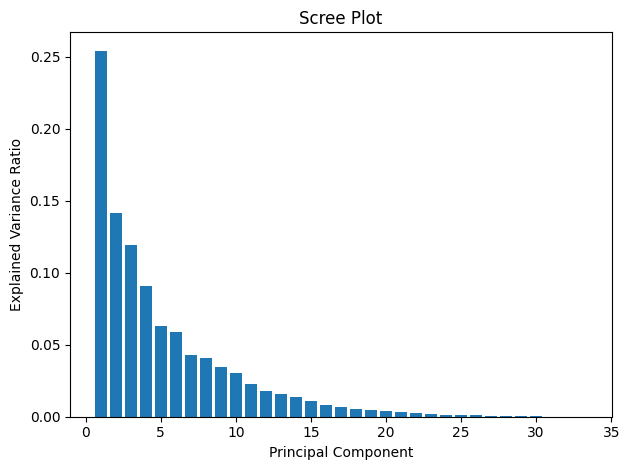

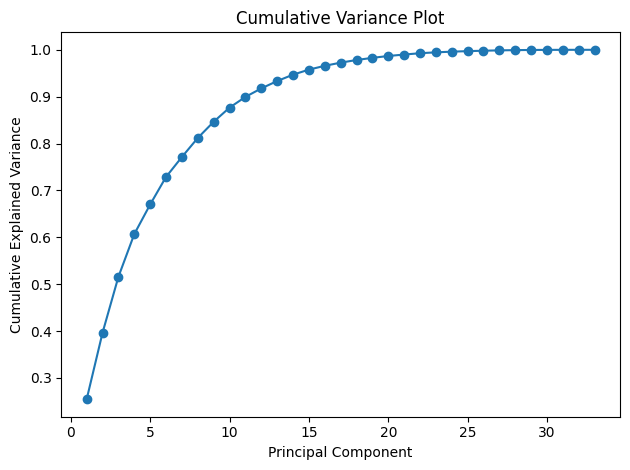

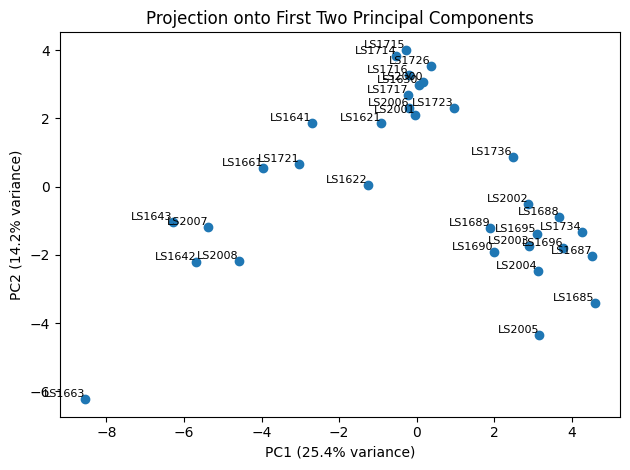

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
# Load the dataset
df = pd.read_csv(r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv')


# Extract sample identifiers (non-numeric first column)
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]

# Select only numeric columns (features and output)
numeric_df = df.select_dtypes(include=[np.number])

# Separate features by dropping the last numeric column (output)
features = numeric_df.iloc[:, :-1]
# save the output column
output = numeric_df.iloc[:, -1]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_ratio = pca.explained_variance_ratio_
pc1_var = explained_ratio[0] * 100
pc2_var = explained_ratio[1] * 100

# 1) Scree Plot
plt.figure()
plt.bar(range(1, len(explained_ratio) + 1), explained_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.tight_layout()

# 2) Cumulative Variance Plot
cum_ratio = explained_ratio.cumsum()
plt.figure()
plt.plot(range(1, len(cum_ratio) + 1), cum_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.tight_layout()

# 3) Scatter Plot of PC1 vs PC2 with variance and sample labels
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, name in enumerate(sample_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)')
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)')
plt.title('Projection onto First Two Principal Components')
plt.tight_layout()
plt.show()

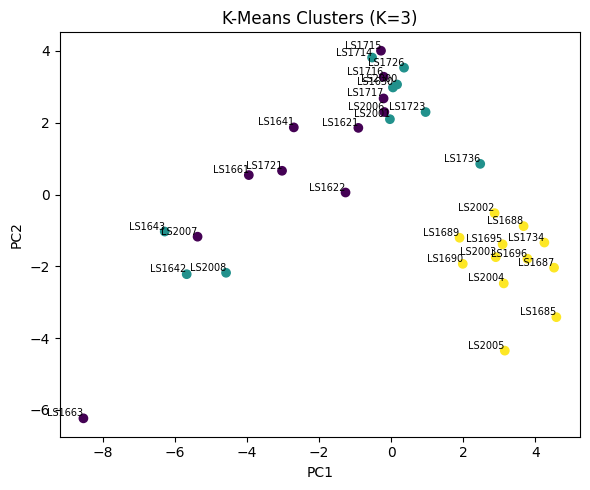

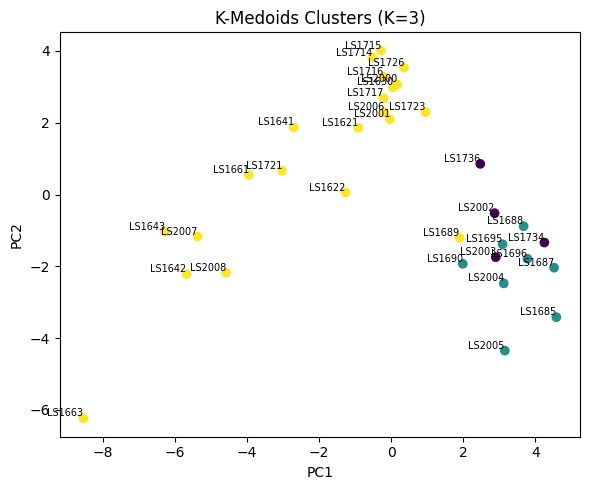

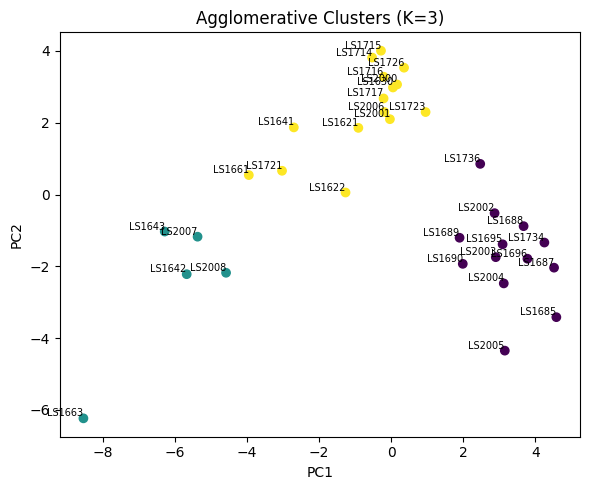

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]
numeric_df = df.select_dtypes(include=[np.number])
features = numeric_df.iloc[:, :-1]
## drop output column
try:
    features = features.drop(columns=['output'])
except KeyError:
    pass    
# Standardize features
X_scaled = StandardScaler().fit_transform(features)

# PCA for visualization
X_pca2 = PCA(n_components=2, random_state=0).fit_transform(X_scaled)

# Number of clusters
K = 3

# K-Means
labels_km = KMeans(n_clusters=K, random_state=0).fit_predict(X_scaled)

# K-Medoids (PAM implementation)
def kmedoids_pam(X, K, max_iter=100):
    n = X.shape[0]
    medoids = np.random.choice(n, K, replace=False)
    for _ in range(max_iter):
        # Assign to nearest medoid
        D = pairwise_distances(X, X[medoids])
        labels = np.argmin(D, axis=1)
        new_medoids = medoids.copy()
        # Update medoids for each cluster
        for i in range(K):
            cluster_idx = np.where(labels == i)[0]
            if len(cluster_idx) == 0:
                continue
            intra_D = pairwise_distances(X[cluster_idx], X[cluster_idx])
            total_dist = intra_D.sum(axis=1)
            new_medoids[i] = cluster_idx[np.argmin(total_dist)]
        if np.array_equal(new_medoids, medoids):
            break
        medoids = new_medoids
    # Final assignment
    D = pairwise_distances(X, X[medoids])
    return np.argmin(D, axis=1)

labels_kmed = kmedoids_pam(X_scaled, K)

# Agglomerative Clustering
labels_hc = AgglomerativeClustering(n_clusters=K, linkage='ward').fit_predict(X_scaled)

# Results table
results = pd.DataFrame({
    'Sample': sample_names,
    'KMeans': labels_km,
    'KMedoids': labels_kmed,
    'Agglomerative': labels_hc
})


# Plotting helper
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    for i, name in enumerate(sample_names):
        plt.text(X[i,0], X[i,1], name, fontsize=7, ha='right', va='bottom')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.tight_layout()

# Plots
plot_clusters(X_pca2, labels_km, 'K-Means Clusters (K=3)')
plot_clusters(X_pca2, labels_kmed, 'K-Medoids Clusters (K=3)')
plot_clusters(X_pca2, labels_hc, 'Agglomerative Clusters (K=3)')
plt.show()